In [71]:
from main import main
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [74]:
with open("data/pkl/0.1/precisions.pkl", "rb") as f:
    precisions = pickle.load(f)
with open("data/pkl/0.1/recalls.pkl", "rb") as f:
    recalls = pickle.load(f)
with open("data/pkl/0.1/f1_scores.pkl", "rb") as f:
    f1_scores = pickle.load(f)
with open("data/pkl/0.1/timings.pkl", "rb") as f:
    timings = pickle.load(f)

In [76]:
precision_means = []
precision_stds = []
last_iter = max(precisions[0].keys())
for i in range(last_iter+1):
    iter_values = [val[i] for val in precisions]
    precision_means.append(np.mean(iter_values))
    precision_stds.append(np.std(iter_values))

<ErrorbarContainer object of 3 artists>

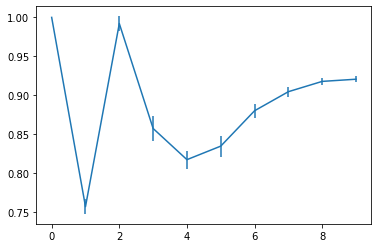

In [77]:
plt.errorbar(range(last_iter+1), precision_means, yerr=precision_stds)

In [78]:
recall_means = []
recall_stds = []
last_iter = max(recalls[0].keys())
for i in range(last_iter+1):
    iter_values = [val[i] for val in recalls]
    recall_means.append(np.mean(iter_values))
    recall_stds.append(np.std(iter_values))

<ErrorbarContainer object of 3 artists>

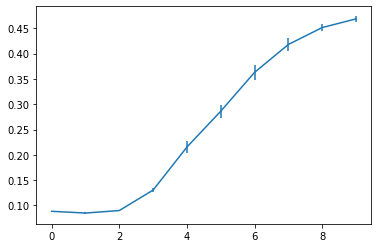

In [79]:
plt.errorbar(range(last_iter+1), recall_means, yerr=recall_stds)

In [80]:
f1_score_means = []
f1_score_stds = []
last_iter = max(f1_scores[0].keys())
for i in range(last_iter+1):
    iter_values = [val[i] for val in f1_scores]
    f1_score_means.append(np.mean(iter_values))
    f1_score_stds.append(np.std(iter_values))

<ErrorbarContainer object of 3 artists>

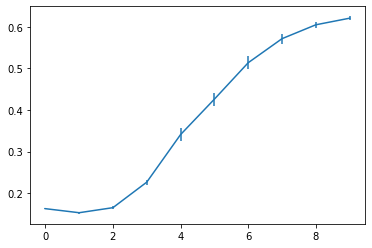

In [81]:
plt.errorbar(range(last_iter+1), f1_score_means, yerr=f1_score_stds)

In [82]:
def bootstrap_metric(metric_list, n_iter):
    """Compute bootstrap means list to be used for computing confidence intervals
        using bootstrap resample"""
    means = []
    last_iter = max(metric_list[0].keys())
    metric_last = [val[last_iter] for val in metric_list]
    for i in range(n_iter):
        # Bootstrap
        metric_sample = np.random.choice(metric_last, size=len(metric_last), replace=True)
        means.append(np.mean(metric_sample))

    return means

In [83]:
def confidence_interval(means, conf_percent):
    # Computing low quantile (2.5 in our case)
    low_p = ((1.0 - conf_percent) / 2.0) * 100
    lower = np.percentile(means, low_p)

    # Computing high quantile
    high_p = (conf_percent + ((1.0 - conf_percent) / 2.0)) * 100
    upper = np.percentile(means, high_p)

    return [lower, upper]

In [84]:
means_precision = bootstrap_metric(precisions, 1000)

In [85]:
interval = confidence_interval(means_precision, 0.95)
print(interval)

[0.9188749090330098, 0.9221036758744637]


In [100]:
def plot_confidence(means_metric, interval):
    # Computing the mean error
    mean = np.mean(means_metric)

    # Plot scores
    plt.hist(means_metric, bins=25)

    # Plot of two interval lines
    plt.axvline(interval[0], color='k', linestyle='dashed', linewidth=1)
    plt.axvline(interval[1], color='k', linestyle='dashed', linewidth=1)
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)

    plt.title("95.0 % confidence interval")
    plt.xlabel("A certain metric mean")
    plt.ylabel("Count")

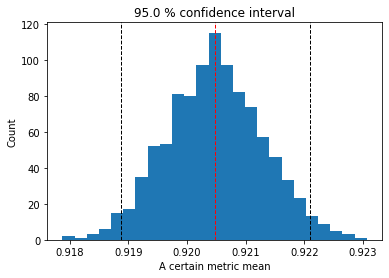

In [101]:
plot_confidence(means_precision, interval)

In [167]:
def plot_error(means_metric, interval):
    #computing the error bar for confidence interval
    mean = np.mean(means_metric)
    up = interval[1] - mean
    down = mean - interval[0]
    # Plotting on bar plot
    plt.bar(x=["Metric"], height=[mean], width = [0.1], yerr=np.array([down, up]).reshape(2,1), align='center', alpha=0.5, ecolor='black', capsize=10)

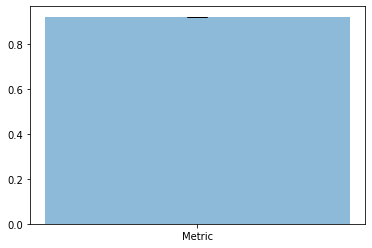

In [168]:
plot_error(means_precision, interval)